First attempt to stablished NUE project

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('cereal-crop-vs-fertilizer-application.csv')


# iterating the columns
for col in data.columns:
    print(col)

#Change the name columns to Yield and Nitrogen:
data.columns.values[3] = 'Yield'
data.columns.values[4] = 'Nitrogen'

print(data)

Entity
Code
Year
Cereals | 00001717 || Yield | 005419 || tonnes per hectare
Nutrient nitrogen N (total) | 00003102 || Use per area of cropland | 005159 || Kilograms per hectare
Continent
            Entity      Code  Year   Yield  Nitrogen Continent
0         Abkhazia  OWID_ABK  2015     NaN       NaN      Asia
1      Afghanistan       AFG  1961  1.1151      0.13       NaN
2      Afghanistan       AFG  1962  1.0790      0.13       NaN
3      Afghanistan       AFG  1963  0.9858      0.13       NaN
4      Afghanistan       AFG  1964  1.0828      0.13       NaN
...            ...       ...   ...     ...       ...       ...
13361     Zimbabwe       ZWE  2017  1.2033     15.85       NaN
13362     Zimbabwe       ZWE  2018  1.2543     12.22       NaN
13363     Zimbabwe       ZWE  2019  0.7480     12.22       NaN
13364     Zimbabwe       ZWE  2020  1.1486     12.22       NaN
13365     Zimbabwe       ZWE  2021  1.5452       NaN       NaN

[13366 rows x 6 columns]


First attempt to stablished NUE proyect
We want to plot the evolution of yield.

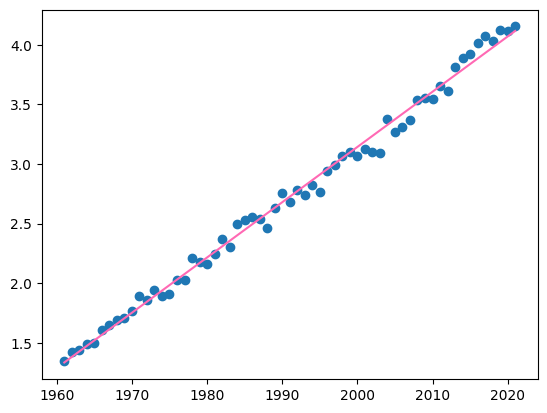

In [3]:
#Filter world data for entity
newdf = data[(data.Entity == "World")]

#Draw regression line, diferent color 
import matplotlib.pyplot as plt
from scipy import stats

slope, intercept, r, p, std_err= stats.linregress(newdf['Year'],newdf['Yield'])

def myfunc(x):
    return slope * x + intercept
mymodel= list(map(myfunc, newdf['Year']))

plt.scatter(newdf['Year'],newdf['Yield'])
plt.plot(newdf['Year'], mymodel, color = 'hotpink')
plt.show()

Question:
How has nitrogen fertilizer use efficiency changed with increasing yields?

Nitrogen use efficiency may be computed as the amount of cereals produced by unit of fertilizer used

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 13086 to 13146
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Entity     61 non-null     object 
 1   Code       61 non-null     object 
 2   Year       61 non-null     int64  
 3   Yield      61 non-null     float64
 4   Nitrogen   60 non-null     float64
 5   Continent  0 non-null      object 
dtypes: float64(2), int64(1), object(3)
memory usage: 3.3+ KB


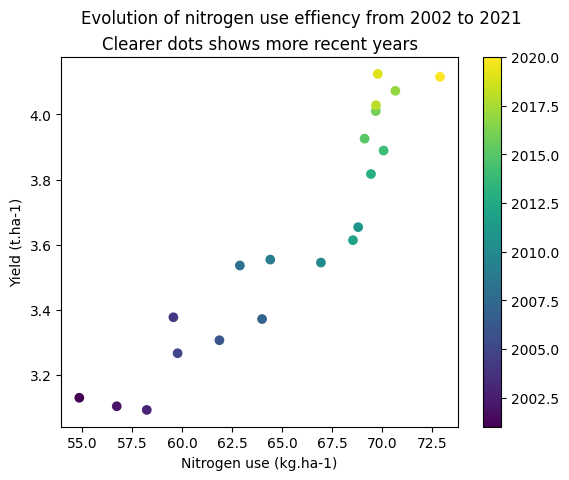

In [4]:
# Start plotting Nitrogen use vs yield as colormap
#import numpy as np

#filter only from Y2K
newdf.info()

#Filter world data for entity
newdf1 = newdf[(newdf.Year >= 2001)&(newdf.Year < 2021)]

#dataframe["date"] = pd.to_datetime(dataframe["date"]) 

plt.scatter(newdf1['Nitrogen'],newdf1['Yield'], c =newdf1['Year'])
plt.suptitle ('Evolution of nitrogen use effiency from 2002 to 2021')
plt.title("Clearer dots shows more recent years")
plt.xlabel("Nitrogen use (kg.ha-1)")
plt.ylabel("Yield (t.ha-1)")
plt.colorbar()
plt.show()

In [6]:
import numpy as np

#Create a new column to measure the efficiency
newdf1['Efficiency'] = newdf1['Yield']/newdf1['Nitrogen']

#newdf1.info()

#newdf1.head()

#wordl_eff_2001 = print(newdf1.iloc[1]['Efficiency'])

#Define conditions for an overview of the evolution of the nitrogen use efficiency since 2001

conditions = [
    (newdf1['Efficiency']== newdf1.iloc[0]['Efficiency']),
    (newdf1['Efficiency'] < newdf1.iloc[0]['Efficiency']),
    (newdf1['Efficiency'] > newdf1.iloc[0]['Efficiency']),
]

#define results
results= ['Stable','Decrease','Increase']

#Create new column based on conditions
newdf1['Eff_relative'] = np.select(conditions, results)

print(newdf1)

#plot the above information
import plotly.express as px

fig = px.scatter(newdf1, x='Nitrogen', y='Yield', text ='Year', color='Eff_relative')
fig.update_traces (textposition = 'top center')
fig.update_layout (title_text= 'Evolution of nitrogen use effiency from 2002 to 2021')
fig.show()



/var/folders/w7/kfpvmy656mq5cx7f8110wd8r0000gn/T/ipykernel_13864/1611716340.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf1['Efficiency'] = newdf1['Yield']/newdf1['Nitrogen']
/var/folders/w7/kfpvmy656mq5cx7f8110wd8r0000gn/T/ipykernel_13864/1611716340.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf1['Eff_relative'] = np.select(conditions, results)


<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 13126 to 13145
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Entity      20 non-null     object 
 1   Code        20 non-null     object 
 2   Year        20 non-null     int64  
 3   Yield       20 non-null     float64
 4   Nitrogen    20 non-null     float64
 5   Continent   0 non-null      object 
 6   Efficiency  20 non-null     float64
dtypes: float64(3), int64(1), object(3)
memory usage: 1.2+ KB
0.054715316411069984
      Entity      Code  Year   Yield  Nitrogen Continent  Efficiency  \
13126  World  OWID_WRL  2001  3.1300     54.86       NaN    0.057054   
13127  World  OWID_WRL  2002  3.1040     56.73       NaN    0.054715   
13128  World  OWID_WRL  2003  3.0927     58.23       NaN    0.053112   
13129  World  OWID_WRL  2004  3.3772     59.56       NaN    0.056702   
13130  World  OWID_WRL  2005  3.2668     59.77       NaN    0.054656   
13131  World

Can we wonder what are the differences in efficiency between countries?

There is a high variability of nitrogen use efficency between countries. Each dot represents one year from 2001 to 2021. Source: Our World in Data

In [28]:
#plot box of Australia, Brazil, China, France, India, United States
import plotly.express as px
#Filter world data for entity
df= data[(data.Year >= 2001) & (data.Year < 2021)]
df_top5 = df.loc[df['Entity'].isin(['Australia', 'Brazil', 'China', 'France', 'India', 'United States'])]

#Create a new column to measure the efficiency
df_top5['Efficiency'] = df_top5['Yield']/df_top5['Nitrogen']

#Create the boxplot
fig = px.box(df_top5, x='Entity', y='Efficiency', points ='all', labels= { "Entity": "Country", "Efficiency": "NUE (t of cereals per kg N)"})
fig.update_layout (title_text= 'Comparison of nitrogen use efficiency (NUE)')

fig.show()

/var/folders/w7/kfpvmy656mq5cx7f8110wd8r0000gn/T/ipykernel_13864/4219097288.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Highlighting one country

In this case, we are going to highlight only the case of USA.

In [ ]:
#Highlight only one country
